### <center>  2. Типы данных в PostgreSQL

##### <center> ОБЗОР ТИПОВ ДАННЫХ

Особенностью хранения данных в БД является их **строгая типизация**, то есть **точное** и **явное** **определение типов**. 

##### <center> ОСНОВНЫЕ ТИПЫ ДАННЫХ В POSTGRESQL

>**SQL** — это язык со строгой типизацией, в котором каждый элемент данных имеет некоторый тип, определяющий его поведение и допустимое использование.

**Типы данных** в PostgreSQL можно разделить на несколько групп. К *основным* относятся:

- числовые типы — для хранения чисел (целых и дробных);
- типы даты/времени — для хранения даты, времени, часовых поясов;
- символьные типы — для хранения символов или строк;
- логический тип — для хранения значений типа «истина», «ложь».

→ Каждая группа (кроме логического типа) объединяет несколько типов, отличающихся по допустимому диапазону хранимых данных. Например, числовые типы данных хранят целые числа, дробные числа, а строковые — подразделяются на типы с фиксированной и переменной длиной. А скажем, целочисленный тип данных integer может хранить значения в диапазоне от -2147483648 до 2147483647.

Кроме возможных значений из доступного диапазона, поле независимо от выбранного типа может принимать значение *NULL* (отсутствующее значение).

>Напоминаем, что *NULL* отличается от нулевого значения или поля, содержащего пробел или пустую строку.

##### <center> И ЕЩЕ РАЗ О ВАЖНОСТИ ТИПИЗАЦИИ

В зависимости от требований к хранимой информации необходимо правильно применять типы данных. На это есть как минимум две **причины**.

**1. Разные типы данных могут занимать разный объём памяти.**

Например, если заранее известно, что поле таблицы будет принимать только небольшие числовые значения от 1 до 10, то можно не задавать для него тип `bigint` с максимально возможными хранимыми значениями, достаточно будет типа `smallint` (эти типы не будут предметом нашего обсуждения, но вы может посмотреть их описание в таблице).

**2. На преобразование типов данных тратится время.**

В некоторых случаях может потребоваться преобразование одного типа в другой — например, если нужно извлечь число из строки и произвести с ним какие-либо действия. Для подобных преобразований нужно использовать дополнительные функции. Иногда без этого не обойтись, но по возможности лучше хранить данные в полях соответствующего типа.

**ДОПОЛНИТЕЛЬНО**

Максимально подробную информацию по всем существующим типам данных вы можете посмотреть в [документации](https://postgrespro.ru/docs/postgrespro/9.5/datatype).

### <center> 3. Даты: основные типы

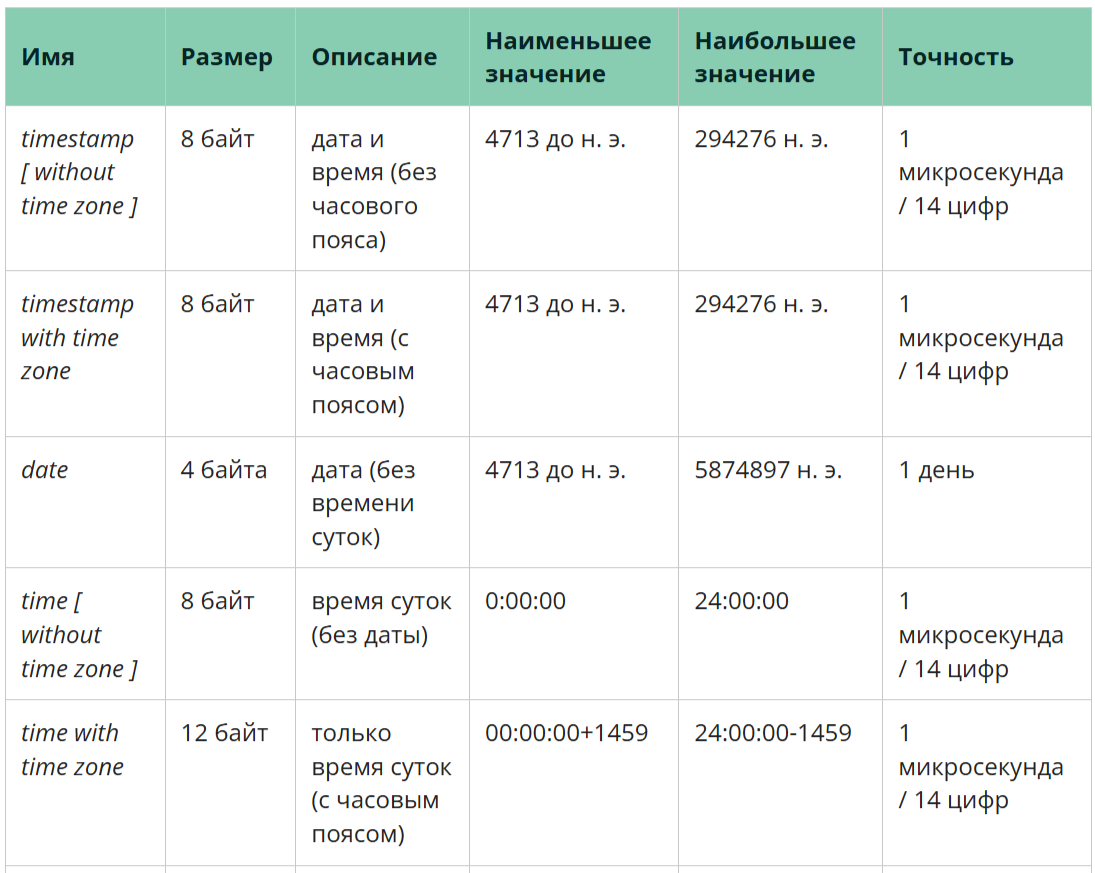
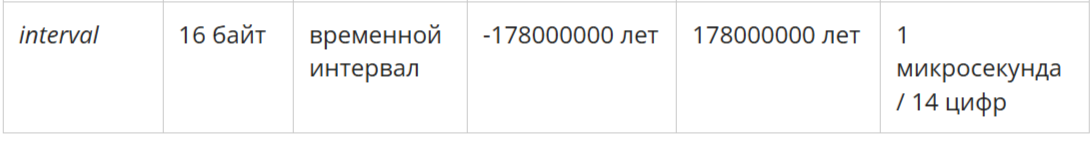

>**Timestamp** — наиболее распространённый тип данных, так как он содержит и дату, и время, а также используется в любых логах событий, временных рядах и в большинстве системных таблиц

Согласно стандарту ISO, значение выглядит как "**2019-07-14 01:35:44.702165+00**", где перечислены через точку год-месяц-день, время и часовой пояс.

Для получения текущего значения даты и времени в *Postgres* используются функции `CURRENT_TIMESTAMP` (есть в стандарте SQL) и `NOW()` (есть в большинстве баз данных).

Выполните запросы `SELECT NOW()` и `SELECT CURRENT_TIMESTAMP`.

Глядя на вывод, вы заметите, что время отличается на целое число часов от реального времени у вас (если вы не в Лондоне или, скажем, на Канарских островах). В Москве разница составит 3 часа.

*Почему так?*

##### <center> TIMESTAMP WITH TIME ZONE

>**Timestamp with time zone** позволяет хранить сведения о часовом поясе, что может быть удобно при анализе географически распределённых временных данных для единообразия хранения.

```sql
show timezone -- команда, позволяющая узнать, в каком часовом поясе выводятся временнные данный в настоящий момент
```

Список часовых поясов можно увидеть в системном справочнике:

```sql
SELECT *
FROM pg_timezone_names
```

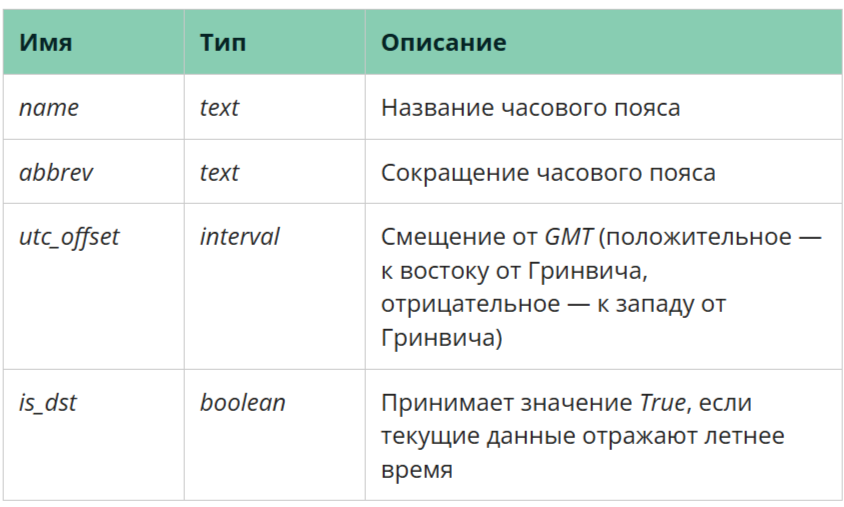



Для того, чтобы посмотреть какое сейчас время в каком_нибудь часовом поясе, выполнить запрос:

```sql
SELECT now() at time zone 'Europe/Moskow'
```

Указание **at time zone** позволяет переводить дату/время без часового пояса в дату/время с часовым поясом и обратно, а также пересчитывать значения времени для различных часовых поясов.

В таблице ниже приведены примеры того, как работает **at time zone** для разных типов данных.

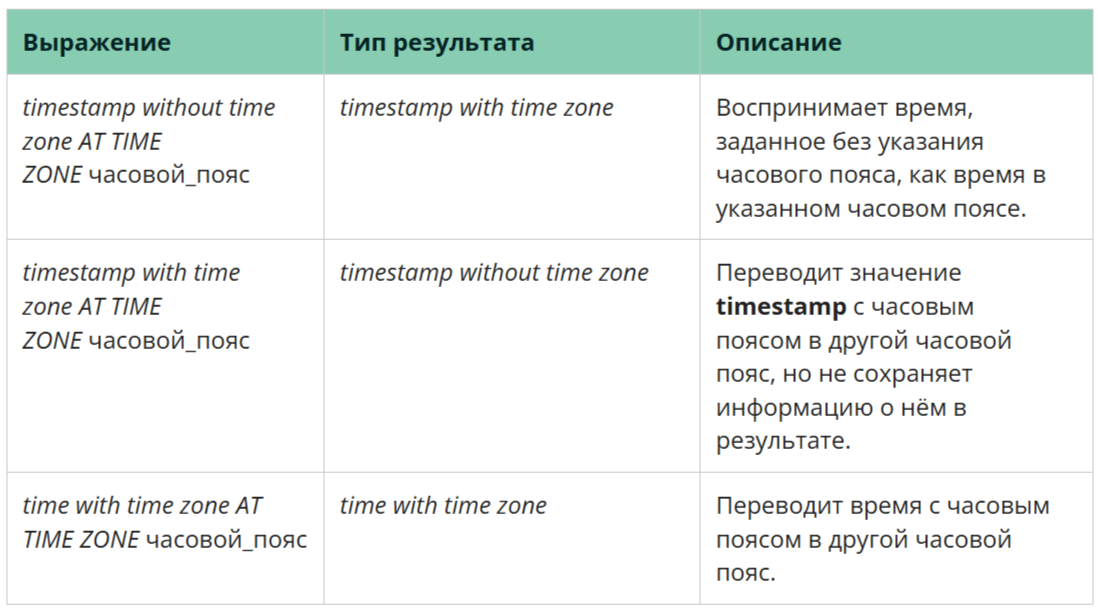

**Задание 3.1**

Давайте узнаем, сколько сейчас времени в другом регионе, например Лос-Анджелесе. Напишите запрос, который выведет текущие время и дату в часовом поясе Лос-Анджелеса ("America/Los_Angeles"). Столбец в выдаче — now (время и дата в нужном часовом поясе).

```sql
SELECT now() at time zone 'America/Los_Angeles' as now
```

##### <center> DATE

Тип *timestamp (with/without time zone)* можно легко перевести в соответствующую дату, используя синтаксис

```sql
"timestamp_column"::date
``

И наоборот, тип date преобразуется в timestamp (дата и 00:00:00) с помощью
```sql
"date_column"::timestamp
```

Для получения текущей даты можно использовать
```sql
SELECT CURRENT_DATE
-- ИЛИ
SELECT now()::date
```


**Задание 3.2**

Предположим, у нас есть дата и время какого-то события и мы хотим посмотреть, к какой дате оно относится для Москвы и для UTC. Используйте следующий подзапрос и выведите дату в ts в Московском часовом поясе и в поясе UTC:

```sql
with x as 
(
select '2018-12-31 21:00:00+00'::timestamp with time zone ts
)
```
Столбцы в выдаче: dt_msk (дата в московском часовом поясе), dt_utc (дата в UTC).

Примечание: в данном куске SQL-кода мы обозначаем результат запроса SQL как таблицу с именем x. В этой таблице содержится столбец ts. Воспользуйтесь этой таблицей для решения задачи. Например, чтобы посмотреть всё содержимое таблицы x, достаточно написать следующий запрос:

```sql
with x as 
(
select '2018-12-31 21:00:00+00'::timestamp with time zone ts
)
select * from x
```

Узнать больше об операторе `with` можно [здесь](https://sql-academy.org/ru/guide/operator-with).

```sql
with x as
(
    SELECT select '2018-12-31 21:00:00+00'::timestamp with time zone ts
)

SELECT
-- Выводим только дату
    (ts AT TIME ZONE 'Europe/Moskow')::date AS dt_msk,
    (ts AT TIME ZONE 'UTC')::date AS dt_utc
FROM
    x
```

##### <center> INTERVAL

>**Interval** — тип данных, позволяющий хранить разницу между двумя временными метками. 

Интервалы хранят данные в трёх отдельных полях — месяцах, днях, секундах. Это сделано из-за того, что количество дней в месяце и часов в дне может быть разным. Пример значения такого типа: "195 days -10:52:23.563955".

### <center> 4. Функции и операторы для работы с датами

##### <center> ФУНКЦИИ

**ФУНКЦИЯ EXTRACT**

`extract()` получает из значений даты/времени такие поля, как год или час.

`extract()` - Функция, которая получает из значений даты/времени такие поля, как год или час.

**Источник** — значение типа `timestamp`, `time` или `interval`. Допускается и тип date, поскольку он приводится к типу `timestamp`.

Функция `extract()` возвращает значения типа *double precision*.

**DAY**

Для значений `timestamp` это день месяца (1-31), для значений `interval` — число дней.
```sql
SELECT EXTRACT(DAY FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 16
``` 

```sql
SELECT EXTRACT(DAY FROM INTERVAL '40 days 1 minute');

Результат: 40
```

**HOUR**

Час (0-23).

```sql
SELECT EXTRACT(HOUR FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 20
```

**MONTH**

Номер месяца, считая с января (1) до декабря (12).

```SQL
SELECT EXTRACT(MONTH FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 2
```

**YEAR**

Поле года. Учтите, что года 0 не было, и это следует иметь в виду, вычитая из годов нашей эры годы до нашей эры.

```SQL
SELECT EXTRACT(YEAR FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 2001
```

**ISOYEAR**

Год по недельному календарю *ISO 8601*, в который попадает дата (*не применимо к интервалам*).

```SQL
SELECT EXTRACT(ISOYEAR FROM DATE '2006-01-01');

Результат: 2005

SELECT EXTRACT(ISOYEAR FROM DATE '2006-01-02');

Результат: 2006
```

Год по недельному календарю ISO начинается с понедельника недели, в которой оказывается 4 января, так что в начале января или в конце декабря год по ISO может отличаться от года по григорианскому календарю. Подробнее об этом рассказывается в описании поля *week*.

**WEEK**

Номер недели в году по недельному календарю *ISO 8601*. По определению, недели ISO 8601 начинаются с понедельника, а первая неделя года включает 4 января этого года. Другими словами, первый четверг года всегда оказывается в первой неделе этого года.

*В системе нумерации недель ISO первые числа января могут относиться к 52-й или 53-й неделе предыдущего года, а последние числа декабря — к первой неделе следующего года.*

Поэтому для получения согласованных результатов рекомендуется использовать поле isoyear в паре с week.

```SQL
SELECT EXTRACT(WEEK FROM TIMESTAMP '2001-02-16 20:38:40');

Результат: 7
```

**CENTURY**

ВЕК

```SQL
SELECT EXTRACT(CENTURY FROM TIMESTAMP '2000-12-16 12:21:13');
Результат: 20

SELECT EXTRACT(CENTURY FROM TIMESTAMP '2001-02-16 20:38:40');
Результат: 21
```

Первый век начался 0001-01-01 00:00:00, хотя люди в то время так и не считали. Это определение распространяется на все страны с григорианским календарём.

Века с номером 0 не было; считается, что 1 наступил после -1.


**DECADE**

Десятилетие.
```SQL
SELECT EXTRACT(DECADE FROM TIMESTAMP '2001-02-16 20:38:40');
Результат: 200
```

**EPOCH**

Для значений *timestamp with time zone* это число секунд с 1970-01-01 00:00:00 UTC (может быть отрицательным); для значений *date* и *timestamp* это число секунд с 1970-01-01 00:00:00 по местному времени, а для *interval* — общая длительность интервала в секундах.

```SQL
SELECT EXTRACT(EPOCH FROM TIMESTAMP WITH TIME ZONE
'2001-02-16 20:38:40.12-08');
Результат: 982384720.12

SELECT EXTRACT(EPOCH FROM INTERVAL '5 days 3 hours');
Результат: 442800
```

Преобразовать время эпохи обратно, в значение дата/время, с помощью `to_timestamp` можно так:

```SQL
SELECT to_timestamp(982384720.12);
Результат: 2001-02-17 04:38:40.12+00
```

**DOW**

День недели, считая с воскресенья (0) до субботы (6).

```SQL
SELECT EXTRACT(DOW FROM TIMESTAMP '2001-02-16 20:38:40');
Результат: 5
```

**DOY**

День года (1-365/366).

```SQL
SELECT EXTRACT(DOY FROM TIMESTAMP '2001-02-16 20:38:40');
Результат: 47
```

**ISODOW**

День недели, считая с понедельника (1) до воскресенья (7).

```SQL
SELECT EXTRACT(ISODOW FROM TIMESTAMP '2001-02-18 20:38:40');
Результат: 7
```

Результат отличается от dow только для воскресенья. Такая нумерация соответствует ISO 8601.

**Задание 4.1**

Давайте посчитаем помесячную статистику по доставкам, используя функцию extract. Напишите запрос, который выведет год, месяц и количество доставок. Отсортируйте по году и по месяцу в порядке возрастания. Столбцы в выдаче: year_n (номер года), month_n (номер месяца), qty (количество доставок).

```sql
SELECT
    EXTRACT(YEAR FROM ship_date) as year_n,
    EXTRACT(MONTH FROM ship_date) as month_n,
    COUNT(*) as qty
FROM
    sql.shipment
GROUP BY
    year_n,
    month_n
ORDER BY
    year_n ASC,
    month_n ASC
```


---

**ФУНКЦИЯ TO_CHAR()**

Функция `to_char()` нужна для форматирования даты времени и интервалов в нужный текст.

Например, вы хотите вывести *год*, *месяц* и *день* со специфическим разделителем или получить *текстовое наименование месяца или дня недели*. По результату работы она очень близка к `extract()`, но больше нацелена именно на **форматирование**. Ниже вы видите таблицу с примерами вызовов:

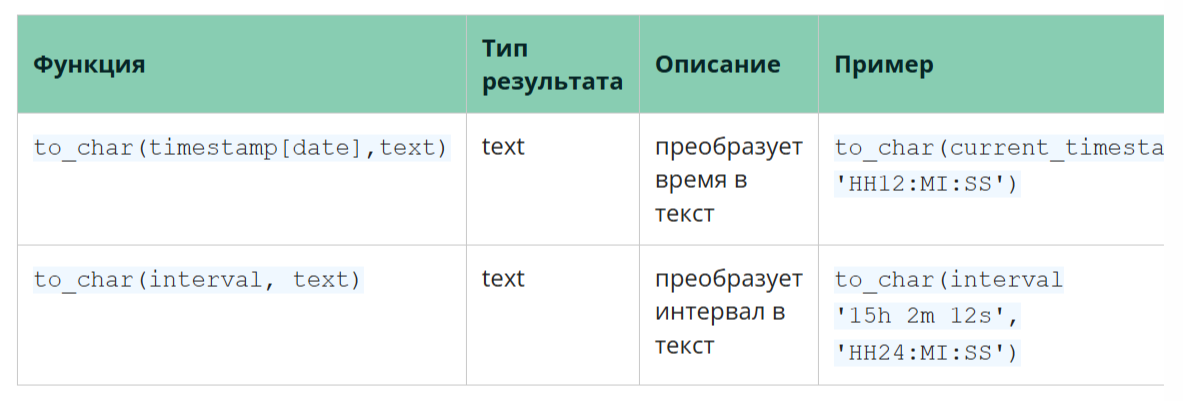

Первый параметр для функции — дата, время или интервал, а второй — текстовая маска получаемого результата. Перечень значений, которые можно использовать для маски, представлен в таблице ниже.

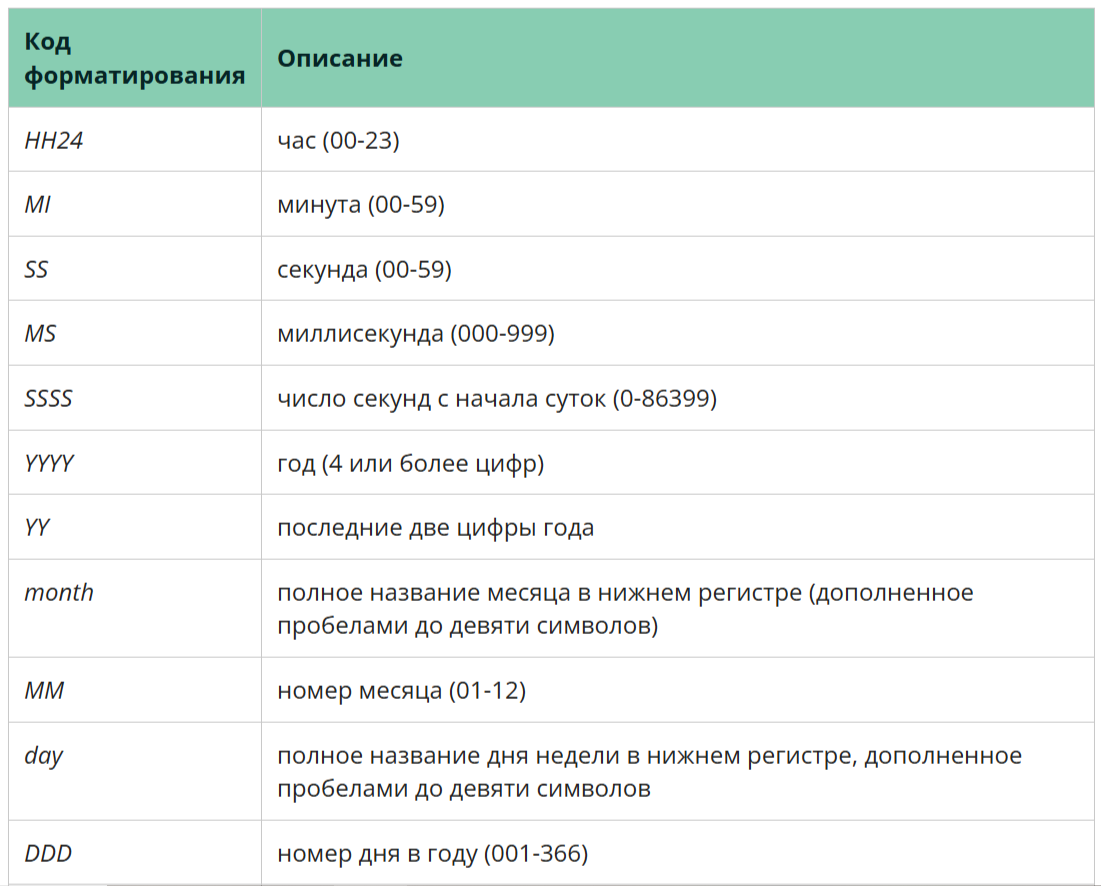
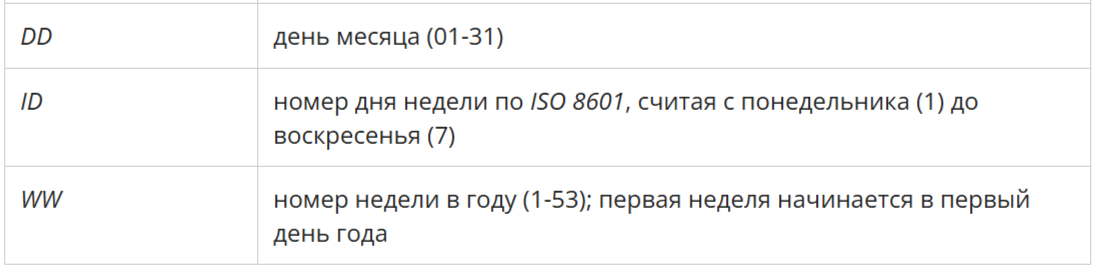

Полный перечень вы можете посмотреть в [подсказке по кодам форматирования](https://postgrespro.ru/docs/postgrespro/9.5/functions-formatting) или таблице

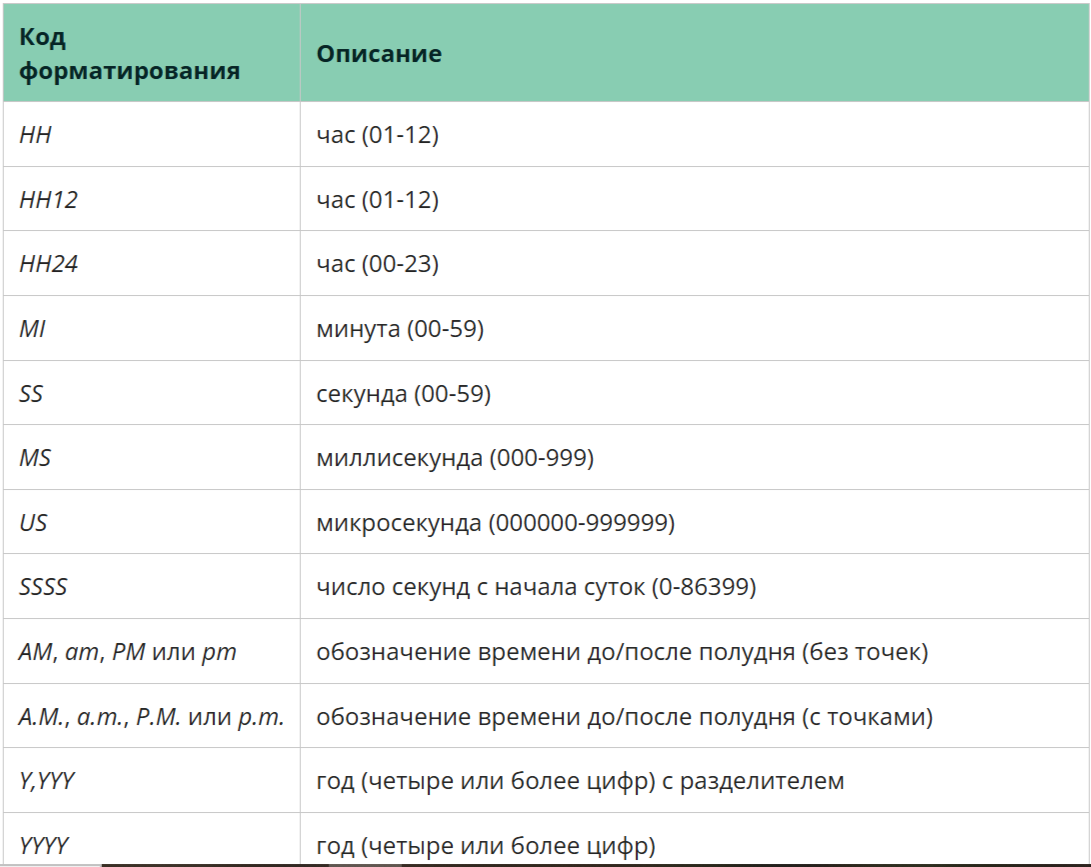
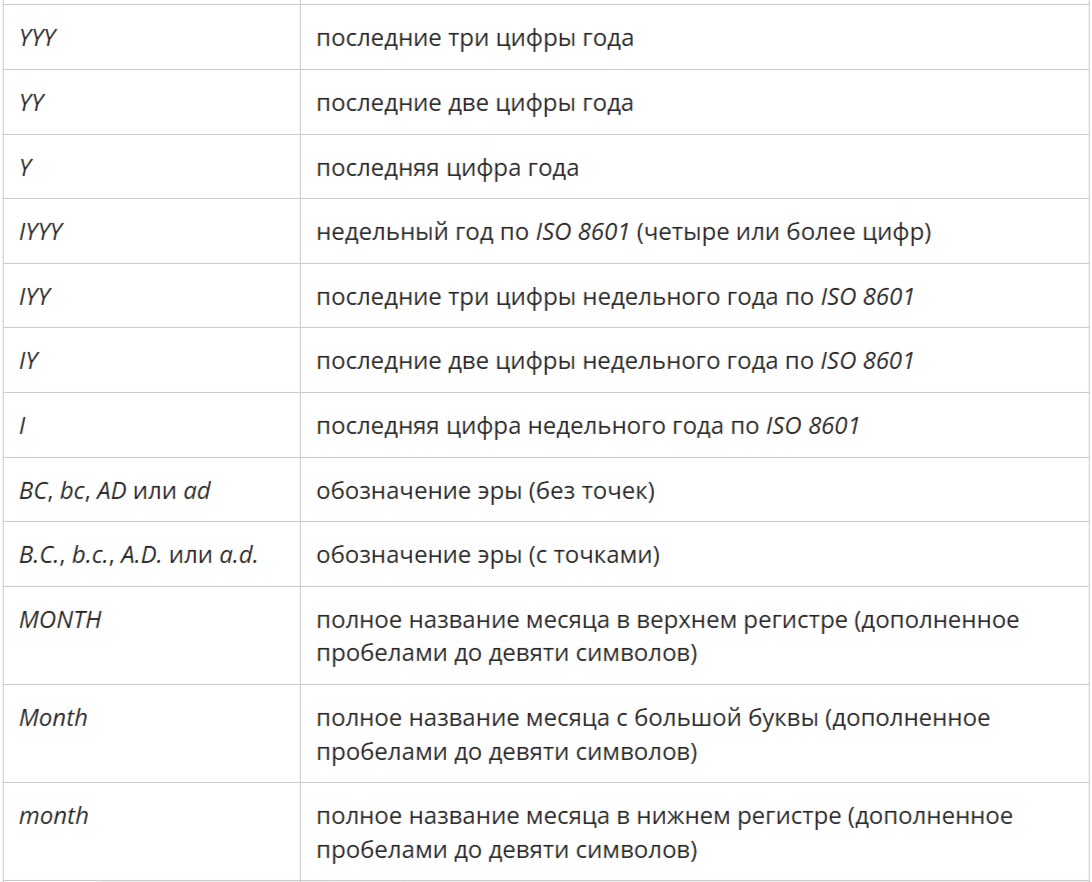
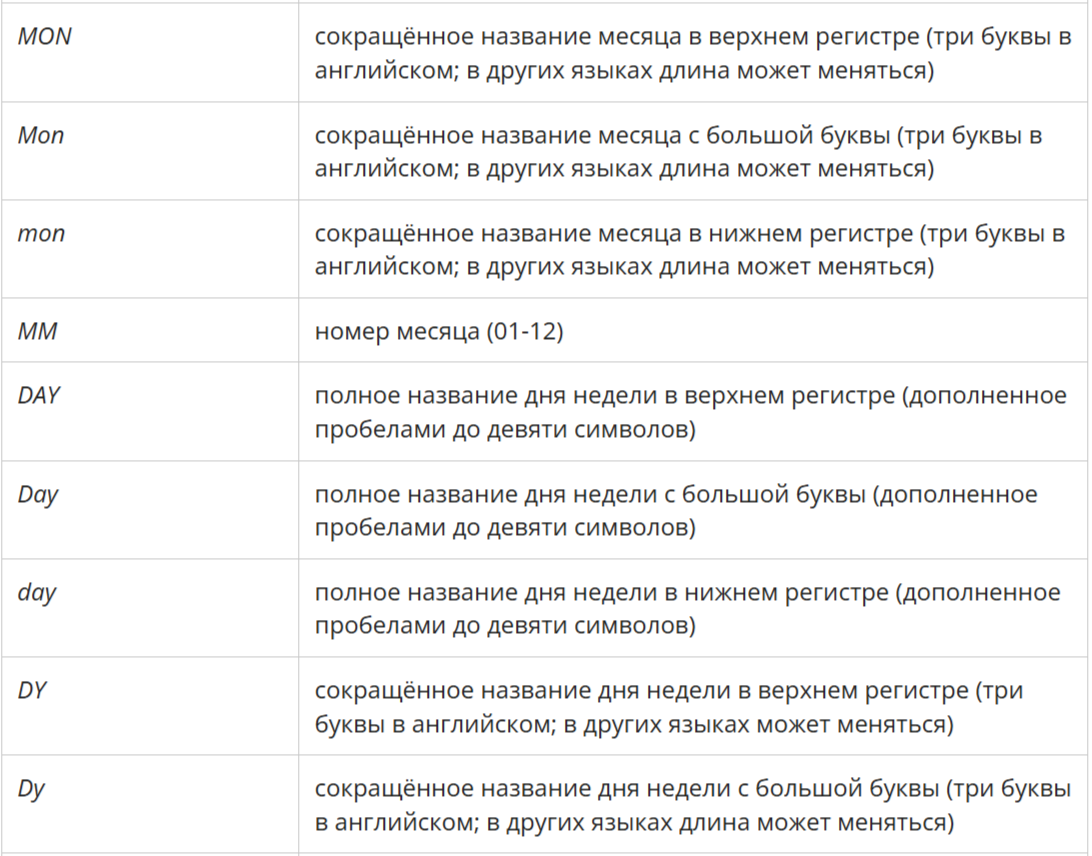
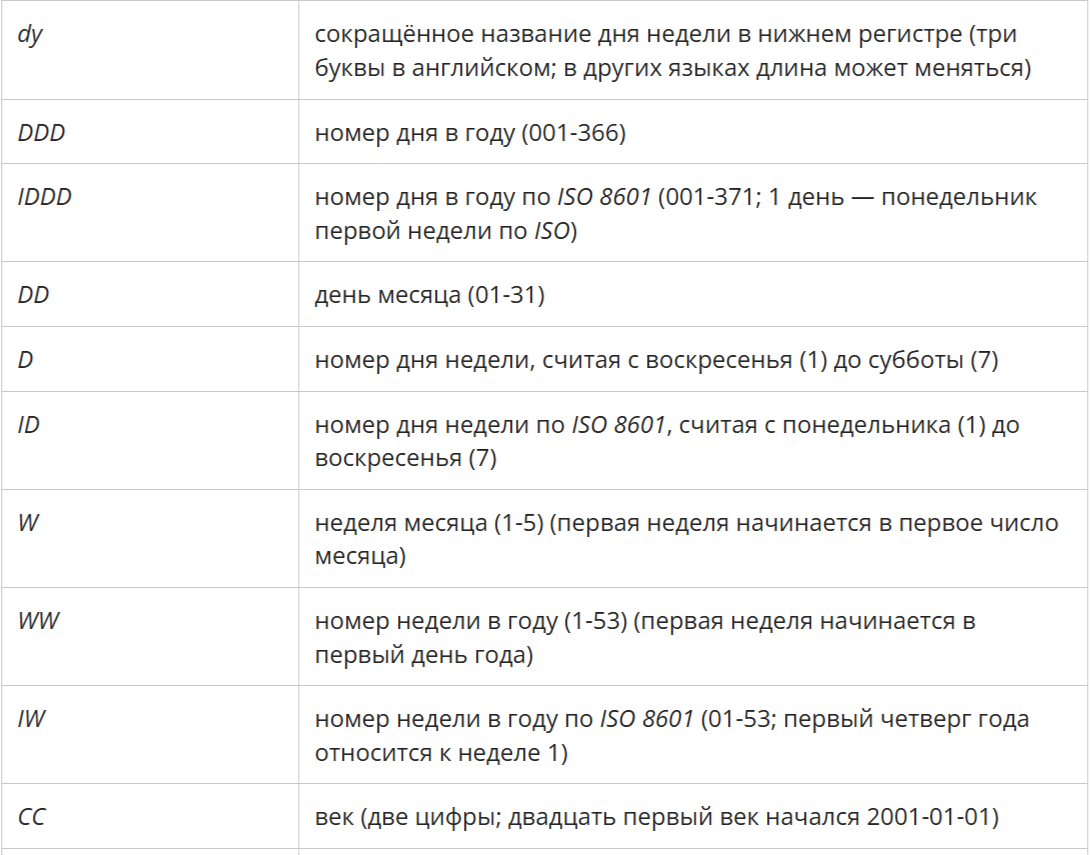
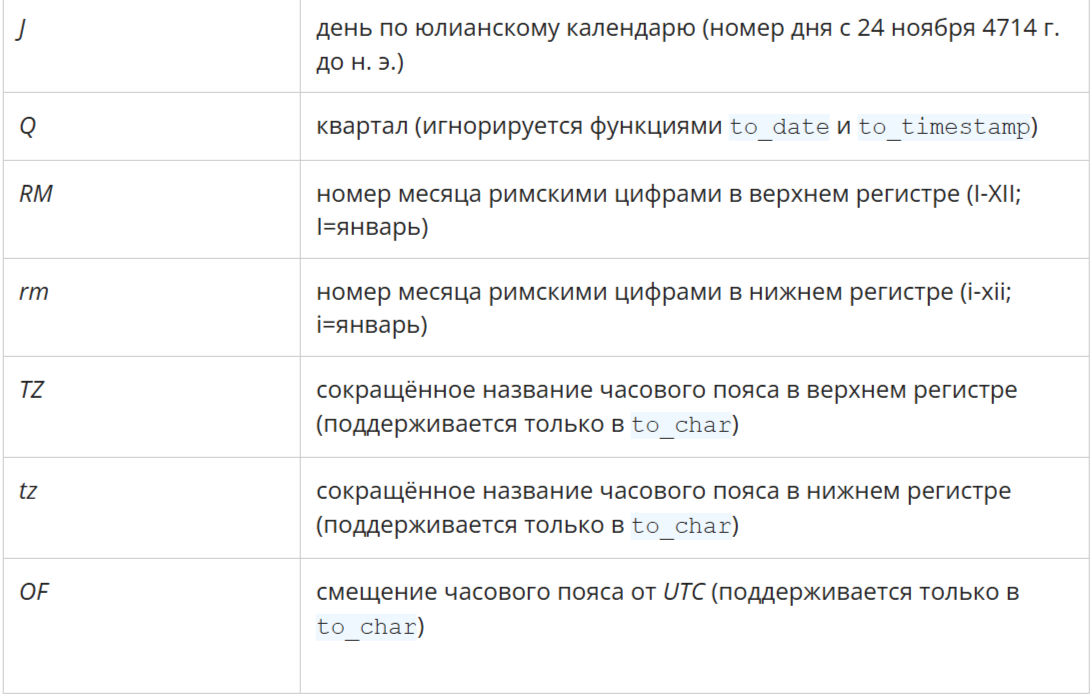


>Любой текст, который относится к кодам форматирования, будет сохранён как есть. Чтобы оставлять какие-то *подсказки* и использовать *обычные буквы, которые не встречаются в таблице выше*, необходимо заключить текст, который нужно оставить без изменений, **в двойные кавычки**.

Предположим, мы хотим вывести сегодняшнюю дату в формате `"Hello! Today is #название дня недели год.название месяца.день#"` текстом. Для этого нужно выполнить следующий код: 

```sql
SELECT TO_CHAR(now(), '"Hello! Today is" DAY yyy-Mon-dd')
```

**Задание 4.2**

Давайте выведем текст текущего времени для сервиса точного времени. Напишите запрос, который выводит текст "Точное время x часов y минут z секунд" (текст в кавычки заключать не нужно), где x, y, z — часы, минуты и секунды соответственно, при условии, что сообщение нужно вывести для московского часового пояса. Время введите в 24-часовом формате. Столбцы в выдаче: msg (сообщение).

```sql
SELECT TO_CHAR(CURRENT_TIMESTAMP AT TIME ZONE 'MSK', '"Точное время" HH24 "часов" MI "минут" SS "секунд"') as msg
```

**ФУНКЦИЯ DATE_TRUNC()**

`date_trunc()` - Функция, которая позволяет отсечь заданное время, дату или дату со временем до нужной точности.

**Формат вызова:**

`date_trunc('поле', значение)`

Например, если мы хотим округлить текущее время-дату до минут, то можно вызвать

```sql
SELECT DATE_TRUNC('minute', now())
```

Для получения разной степени точности вместо minute можно использовать следующие параметры:

- `microseconds`;
- `milliseconds`;
- `second`;
- `minute`;
- `hour`;
- `day`;
- `week`;
- `month`;
- `quarter`;
- `year`;
- `decade`;
- `century`;
- `millennium`.

**Задание 4.3**

Давайте подготовим данные для квартальной отчётности компании. Напишите запрос (таблица shipment), который выведет дату доставки (ship_date), округлённую до квартала, и общую массу доставок (веc посылки - столбец weight). Отсортируйте по кварталу в порядке возрастания. Столбцы в выдаче: q (начало квартала, тип date), total_weight (сумма масс доставок за квартал).

```SQL
SELECT 
    date_trunc('quarter', ship_date)::date AS q,
    SUM(weight) as total_weight
FROM
    sql.shipment
group by
    q
ORDER BY
    q ASC
```

##### <center> МАТЕМАТИЧЕСКИЕ ОПЕРАТОРЫ

К любой дате можно прибавить (и вычесть из неё) целое число X и получить другую дату, которая больше (меньше) изначальной.

```sql
SELECT '2019-01-01'::date + 10

Результат: '2019-01-11'
```

Это — дата на 10 дней позже 2019-01-01.

При добавлении (или вычитании) целого числа к дате *Postgres* учитывает переходы между месяцами и годами и даёт верный ответ, соответствующий календарю. Учитываются даже *високосные* годы.

Пример:

```sql
SELECT '2019-01-01'::date + 500

Результат: '2020-05-15'
```
Как видим, сменились и год, и месяц, и день.


Аналогично можно вычесть из одной даты другую и получить **расстояние в днях между этими датами**. При такой операции тоже будет честная разница по календарю.

Пример:
```sql
SELECT '2019-01-01'::date - '2017-03-01'::date

Результат: 711
```

**Задание 4.4**

Давайте оценим, в каком интервале совершались доставки в разных городах. Напишите запрос, который выведет разницу между последним и первым днём доставки (ship_date из таблицы shipment) по каждому городу (city_name из таблицы city). Отсортируйте по первому и второму столбцам. Столбцы в выдаче: city_name (название города) и days_active (время от первой до последней доставки в днях).

```sql
SELECT
    c.city_name,
    max(s.ship_date) - min(s.ship_date) as days_active
FROM
    sql.shipment as s
    join sql.city as c ON c.city_id = s.city_id
GROUP BY
    c.city_name
ORDER BY
    c.city_name ASC,
    days_active ASC
    ```